# Medical Data Visualizer 

This project is based on the FreeCodeCamp Data Analysis Python Project:
https://repl.it/@freeCodeCamp/fcc-medical-data-visualizer

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

### Step 1: Examine data

In [23]:
df = pd.read_csv('medical_examination.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
print(df.shape)

(70000, 13)


## Step 2: Add Overweight Column
Add an 'overweight' column to the data. To determine if a person is overweight, first calculate BMI by dividing weight in kilograms by the square of height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [35]:
df['bmi'] = df['weight'] / df['height']**2 *10000
df = df.round({'bmi':1})
#df['overweight'] = np.where(df['bmi'] >= 25, '1','0') this won't work for the graph, so I used a different method below:
df.loc[df['weight']/(df['height']/100)**2 > 25, 'overweight'] = 1
df.loc[df['weight']/(df['height']/100)**2 <= 25, 'overweight'] = 0
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0.0


## Step 3: Normalize Data
Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [24]:
medical_dict = { 1: 0, 2 : 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map( medical_dict )
df['gluc'] = df['gluc'].map( medical_dict ) 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0


## Step 4: Cardio Chart
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each 'cardio' value.

In [11]:
df_c=df[["cardio","active","alco", "cholesterol", "gluc","overweight","smoke"]].melt(id_vars=["cardio"]).groupby(['variable','value','cardio']).size().reset_index(name='total')
df_c

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,5691
9,cholesterol,0,1,11924


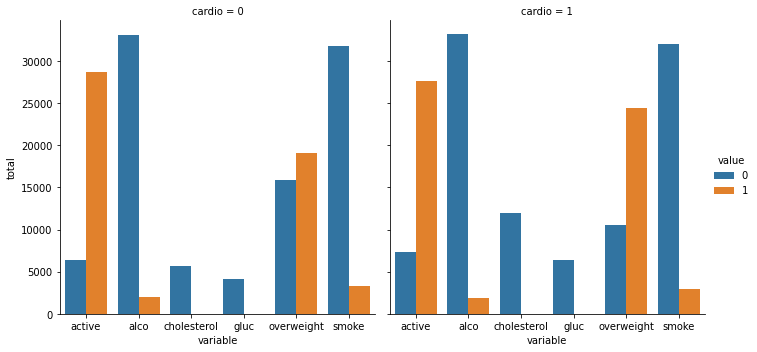

In [12]:
sns.catplot(data = df_c, x='variable', y='total', hue='value', col='cardio', kind="bar")
#plt.savefig('catplot.png')

## Step 5: Cleaning Data
Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less then the 2.5th percentile
- weight is more than the 97.5th percentile

In [36]:
# Option1: creat a filter list then use df.loc method
filt = ((df['ap_lo'] <= df['ap_hi']) &
                  (df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975)) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975)))
df3 = df.loc[filt]
print(df3.shape)

(63259, 15)


In [37]:
# Option2: use df.loc method directly 
df_filter= df.loc[(df['ap_lo'] <= df['ap_hi']) &
                  (df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975)) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975))]
df_filter.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0.0


In [38]:
print(df_filter.shape)
#why is this method different than the line by line method below?

(63259, 15)


In [16]:
# Option3: filter the original dataframe line by line per each condition
#pressure
pressure = df[df['ap_lo'] <= df['ap_hi']]
print(pressure.shape)

(68766, 15)


In [17]:
#height 1
height1 = pressure[pressure['height'] >= pressure['height'].quantile(0.025)]
print(height1.shape)

(67260, 15)


In [18]:
#height 2
height2 = height1[height1['height'] <= height1['height'].quantile(0.975)]
print(height2.shape)

(65859, 15)


In [19]:
#weight 1
weight1 = height2[height2['weight'] >= height2['weight'].quantile(0.025)]
print(weight1.shape)

(64384, 15)


In [20]:
#weight 2
weight2 = weight1[weight1['weight'] <= weight1['weight'].quantile(0.975)]
print(weight2.shape)

(62784, 15)


## Step 6: Correlation Matrix
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

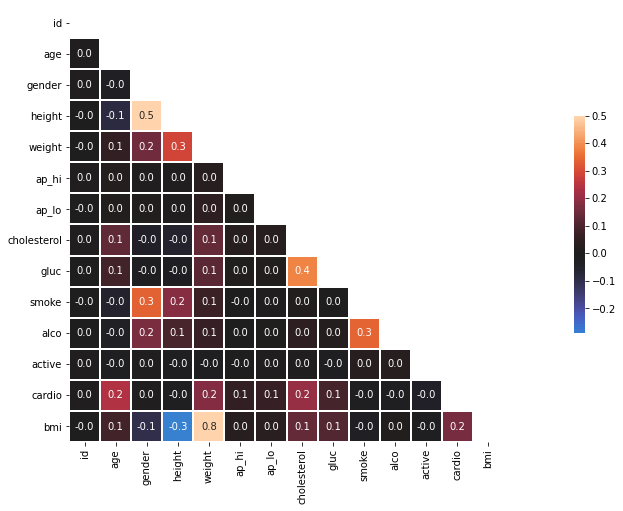

In [ ]:
#Correlation matrix with original data
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='0.1f', linewidth=1, linecolor='white', square=True, mask=matrix, center=0, vmax=0.5, cbar_kws={"shrink": 0.5})

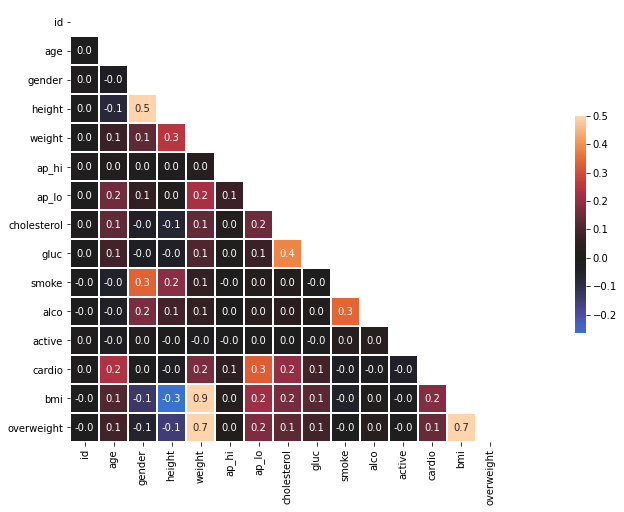

In [39]:
#Correlation matrix with filtered data
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
matrix = np.triu(df_filter.corr())
sns.heatmap(df_filter.corr(), annot=True, fmt='0.1f', linewidth=1, linecolor='white', square=True, mask=matrix, center=0, vmax=0.5, cbar_kws={"shrink": 0.5})